# **Autoencoders**


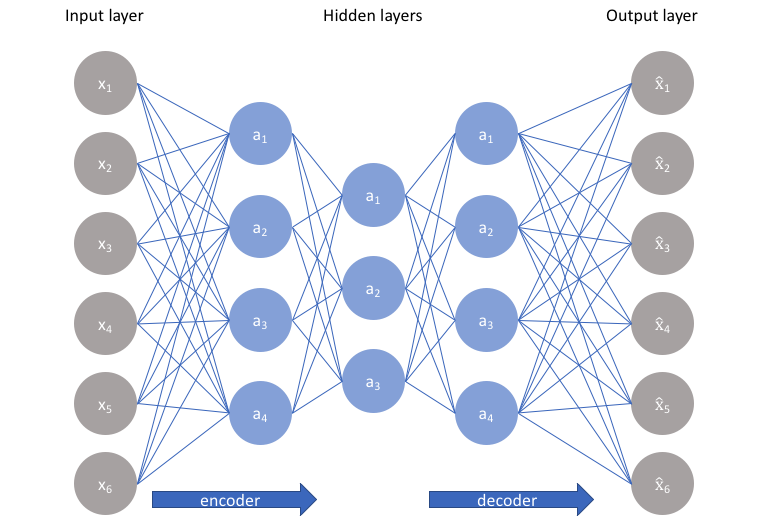

Autoencoders bir unsupervised learning algoritmasıdır. Bu sebeple öğrenilecek belirli labellar yoktur.

**Amaç:**

*   **Dimensionality reduction:** bir autoencoder'daki en önemli featureları ortaya çıkarmayı amaçlar.(feature extraction) En önemli kısmı ne kadar belirlenildiğine göre değişir.

Inputu autoencoder modeline koyarak tekrardan aynı input output olarak elde edilir. Amaç input output'a kopyalanırken ortaya çıkan feature'ları kullanmaktır. Eğer input output'a %100 kopyalanmışsa güzel feature'lar elde edilmiş demektir.

Feature extraction işlemi şu şekilde yapılmaktadır:

Input(x) encoder'a koyulur. Encoder işlemi inputları compress yapar. Compress işlemi ile inputu ifade edebilecek en iyi feature'lar ortaya çıkar.

Decoding kısmında compress yapılmış input uncompress yapılır.

Input ile output arasındaki loss minimum seviyede tutulmaya çalışılır. Böylelikle input ile output'un aynı olması hedeflenir.

Tüm lossların toplamını en düşük seviyeye getirmek için backward propagation yapılarak weightler güncellenir.

Modelin öğrenebilmesi için;

Input size >= hidden size (hidden layer'daki node sayısı)


*   **Denoising:** Hatalardan temizlemek demektir.

Input'a noise verilerek corrupted görsel elde edilir.

Noise verilmiş görsel autoencoder'a koyulur. 

Çıkan sonuçlar orijinal görsele verilir.

Böylelikle modelin noise'u öğrenmesi sağlanmış olur.

Daha sonrasında corrupted image input olarak verildiğinde denoise edilebilir.



**Fashion Mnist Dataset**

Ayakkabı, çanta, pantolon gibi 10 tane unique class'tan oluşan bir datadır.

In [ ]:
#importing libraries
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import json, codecs
import warnings
warnings.filterwarnings("ignore")

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Fashion Mnist datası Keras kütüphanesinden indirilir.

Autoencoder bir unsupervised algoritması olduğu için labellara ihtiyaç yoktur.

Input da output da feature'lardır.

Bu yüzden y_train ve y_test yüklenmez.

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

Görsellerin type'ı uint8'den float32'ye çevrilir.

Aynı zamanda normalization yapılarak algoritmanın daha hızlı çalışması sağlanır.

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Train datasında 60000 sample, test datasında 10000 sample bulunmaktadır.

Görseller 28x28 boyutundadır.

In [ ]:
x_train = x_train.reshape((len(x_train), x_train.shape[1:][0]*x_train.shape[1:][1]))
x_test = x_test.reshape((len(x_test), x_test.shape[1:][0]*x_test.shape[1:][1]))

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Görseller reshape yapılıp tek satırdan oluşan bir vektör haline getirilir.

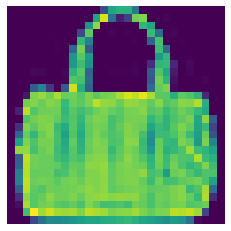

In [ ]:
plt.imshow(x_train[4000].reshape(28,28))
plt.axis("off") #eksenler kapatılır.
plt.show()

Görseller kerasta eğitilebilmek için tek bir vektör halinde olmalıdır.

Ancak matplotlib'de görselleştirmek için 28x28 boyutunda olmalıdır.

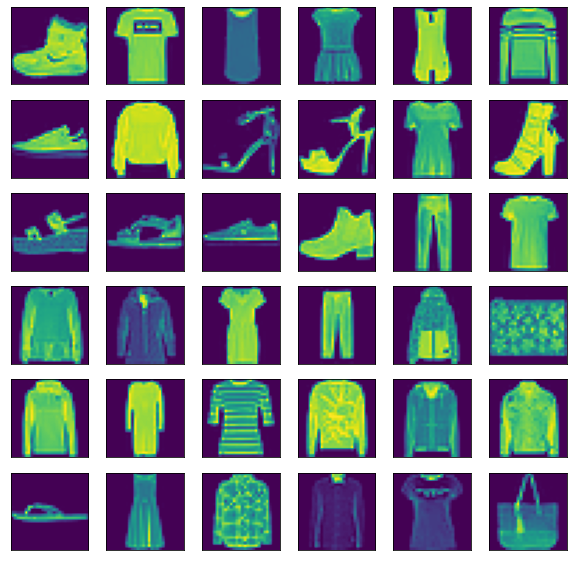

In [ ]:
#visualizing
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = [x_train[i]]
    img = np.reshape(img, (28, 28))
    plt.imshow(img)
plt.show()

In [ ]:
#train
input_img = Input(shape = (784,)) #input layer'ının shape'i belirlenir.

encoded = Dense(32, activation="relu")(input_img) #input layer 32 node'dan oluşan encoder layer'a bağlanır.

encoded = Dense(16, activation="relu")(encoded) #32 node'dan oluşan encoder 16 node'dan oluşan encoder layerlayer 16 node'dan oluşan encoder layer'a bağlanmıştır.

decoded = Dense(32, activation="relu")(encoded) #16 node'dan oluşan encoder layer 32 node'dan oluşan decoder layer'a bağlanır.

decoded = Dense(784, activation="sigmoid")(decoded) #32 node'dan oluşan decoder layer output layer'a bağlanır.

autoencoder = Model(input_img,decoded) #autoencoder modeli oluşturulur. (inputtan outputa kadar)

autoencoder.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics = ["accuracy"])

hist = autoencoder.fit(x_train, #input  
                       x_train, #output -> autoencoder unsupervised learning algoritması olduğu için input ve output aynıdır.
                       epochs=200,
                       batch_size=256,
                       shuffle=True, #shuffle True olduğunda data karıştırılır.
                       validation_data = (x_train,x_train))

Epoch 1/200
235/235 [==============================] - 5s 15ms/step - loss: 0.4000 - accuracy: 0.0095 - val_loss: 0.3474 - val_accuracy: 0.0149
Epoch 2/200
235/235 [==============================] - 3s 14ms/step - loss: 0.3357 - accuracy: 0.0124 - val_loss: 0.3254 - val_accuracy: 0.0109
Epoch 3/200
235/235 [==============================] - 3s 12ms/step - loss: 0.3237 - accuracy: 0.0137 - val_loss: 0.3197 - val_accuracy: 0.0115
Epoch 4/200
235/235 [==============================] - 3s 13ms/step - loss: 0.3180 - accuracy: 0.0157 - val_loss: 0.3198 - val_accuracy: 0.0140
Epoch 5/200
235/235 [==============================] - 3s 13ms/step - loss: 0.3145 - accuracy: 0.0175 - val_loss: 0.3121 - val_accuracy: 0.0188
Epoch 6/200
235/235 [==============================] - 3s 12ms/step - loss: 0.3116 - accuracy: 0.0171 - val_loss: 0.3099 - val_accuracy: 0.0191
Epoch 7/200
235/235 [==============================] - 3s 14ms/step - loss: 0.3092 - accuracy: 0.0175 - val_loss: 0.3068 - val_accuracy:

235/235 [==============================] - 3s 12ms/step - loss: 0.2898 - accuracy: 0.0205 - val_loss: 0.2896 - val_accuracy: 0.0214
Epoch 58/200
235/235 [==============================] - 3s 12ms/step - loss: 0.2897 - accuracy: 0.0202 - val_loss: 0.2911 - val_accuracy: 0.0193
Epoch 59/200
235/235 [==============================] - 3s 14ms/step - loss: 0.2896 - accuracy: 0.0203 - val_loss: 0.2894 - val_accuracy: 0.0190
Epoch 60/200
235/235 [==============================] - 3s 14ms/step - loss: 0.2896 - accuracy: 0.0209 - val_loss: 0.2897 - val_accuracy: 0.0185
Epoch 61/200
235/235 [==============================] - 3s 13ms/step - loss: 0.2895 - accuracy: 0.0214 - val_loss: 0.2894 - val_accuracy: 0.0196
Epoch 62/200
235/235 [==============================] - 3s 14ms/step - loss: 0.2895 - accuracy: 0.0214 - val_loss: 0.2893 - val_accuracy: 0.0247
Epoch 63/200
235/235 [==============================] - 3s 13ms/step - loss: 0.2894 - accuracy: 0.0210 - val_loss: 0.2918 - val_accuracy: 0.019

235/235 [==============================] - 3s 13ms/step - loss: 0.2877 - accuracy: 0.0209 - val_loss: 0.2875 - val_accuracy: 0.0226
Epoch 114/200
235/235 [==============================] - 3s 13ms/step - loss: 0.2877 - accuracy: 0.0214 - val_loss: 0.2880 - val_accuracy: 0.0220
Epoch 115/200
235/235 [==============================] - 3s 13ms/step - loss: 0.2876 - accuracy: 0.0219 - val_loss: 0.2873 - val_accuracy: 0.0187
Epoch 116/200
235/235 [==============================] - 3s 12ms/step - loss: 0.2876 - accuracy: 0.0204 - val_loss: 0.2878 - val_accuracy: 0.0200
Epoch 117/200
235/235 [==============================] - 3s 12ms/step - loss: 0.2876 - accuracy: 0.0213 - val_loss: 0.2871 - val_accuracy: 0.0190
Epoch 118/200
235/235 [==============================] - 3s 13ms/step - loss: 0.2876 - accuracy: 0.0214 - val_loss: 0.2877 - val_accuracy: 0.0221
Epoch 119/200
235/235 [==============================] - 3s 13ms/step - loss: 0.2876 - accuracy: 0.0215 - val_loss: 0.2878 - val_accuracy:

235/235 [==============================] - 3s 12ms/step - loss: 0.2867 - accuracy: 0.0215 - val_loss: 0.2866 - val_accuracy: 0.0224
Epoch 170/200
235/235 [==============================] - 3s 12ms/step - loss: 0.2867 - accuracy: 0.0225 - val_loss: 0.2867 - val_accuracy: 0.0211
Epoch 171/200
235/235 [==============================] - 3s 12ms/step - loss: 0.2867 - accuracy: 0.0224 - val_loss: 0.2862 - val_accuracy: 0.0226
Epoch 172/200
235/235 [==============================] - 3s 13ms/step - loss: 0.2867 - accuracy: 0.0223 - val_loss: 0.2869 - val_accuracy: 0.0198
Epoch 173/200
235/235 [==============================] - 3s 14ms/step - loss: 0.2866 - accuracy: 0.0227 - val_loss: 0.2864 - val_accuracy: 0.0209
Epoch 174/200
235/235 [==============================] - 3s 13ms/step - loss: 0.2866 - accuracy: 0.0223 - val_loss: 0.2866 - val_accuracy: 0.0196
Epoch 175/200
235/235 [==============================] - 3s 13ms/step - loss: 0.2866 - accuracy: 0.0222 - val_loss: 0.2868 - val_accuracy:

In [ ]:
#save weights
autoencoder.save_weights("autoencoder_model.h5")

Modelin weightleri kaydedilmiştir.

In [ ]:
#save model
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Modelin parametrelerine bakılır.

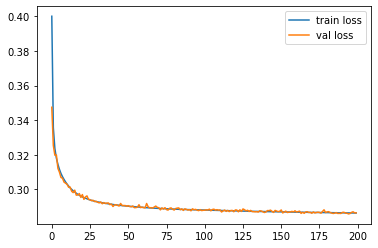

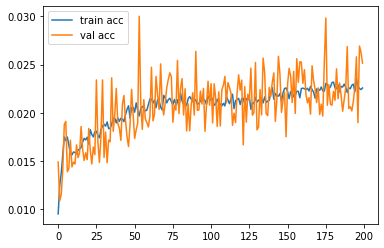

In [ ]:
plt.plot(hist.history["loss"], label = "train loss")
plt.plot(hist.history["val_loss"], label = "val loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "train acc")
plt.plot(hist.history["val_accuracy"], label = "val acc")
plt.legend()
plt.show()

In [ ]:
#save hist
with open("autoencoders_hist.json","w") as f:
    json.dump(hist.history,f)

Model kaydedilir.

In [ ]:
#load history
with codecs.open("autoencoders_hist.json","r", encoding="utf-8")  as f:
    n = json.loads(f.read())

Kaydedilen model yüklenir.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


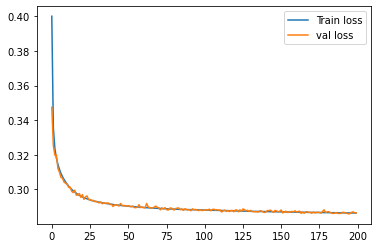

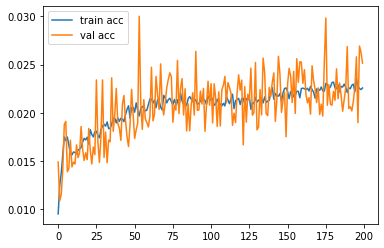

In [ ]:
print(n.keys())
plt.plot(n["loss"],label = "Train loss")
plt.plot(n["val_loss"], label = "val loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(n["accuracy"], label = "train acc")
plt.plot(n["val_accuracy"], label = "val acc")
plt.legend()
plt.show()

Modelin oluşturduğu outputların input görsellerine ne kadar benzediğine bakılacaktır.

In [ ]:
encoder = Model(input_img,encoded) #inputtan başlayıp decoder layer'a kadar olan model
encoded_img = encoder.predict(x_test) 

313/313 [==============================] - 1s 2ms/step


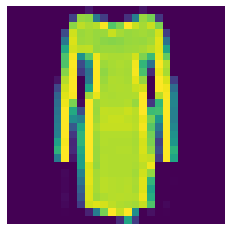

In [ ]:
plt.imshow(x_test[1500].reshape(28,28))
plt.axis("off")
plt.show()

Orijinal görsel

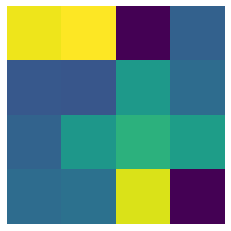

In [ ]:
plt.figure()
plt.imshow(encoded_img[1500].reshape(4,4))
plt.axis("off")
plt.show()

Encoder modelinde elde edilen görsel

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 3ms/step


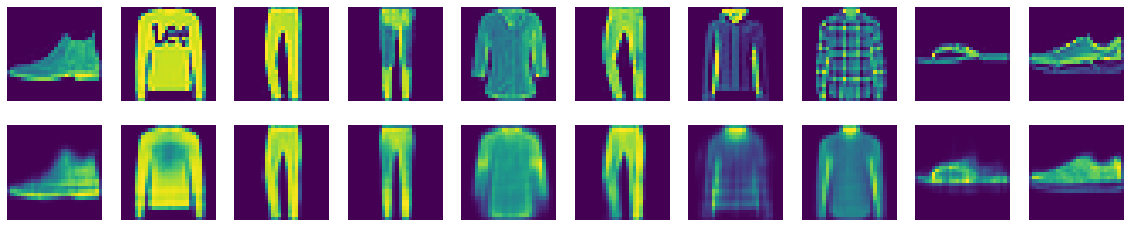

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.axis("off")
plt.show()

Autoencoder modelinde input görselleri ile output görsellerine bakılmıştır.

Görsellerin shape'inin büyük ölçüde korunduğu görülür.

Ancak daha karmaşık olan feature'lar tahmin edilememiştir.